In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Read file and extract two columns

In [2]:
df0 = pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv", index_col="title_orig")
df = df0[["units_sold","rating"]]

### Sort by units_sold

In [3]:
df.sort_values(by=['units_sold'], ascending=False)

units_sold  rating
title_orig                                                            
New Aeeival Women Clothing Long Sleeve Autumn W...      100000    3.76
Womens Summer Red White and Blue Chiffon Short-...      100000    3.98
Women Stretchy Camisole Spaghetti Strap Long Ta...      100000    4.10
Women's Summer Sexy Sleeveless Turtleneck Mini ...      100000    3.53
2018 New Fashion Women's Tops Sexy Strappy Slee...      100000    3.83
...                                                        ...     ...
Personal Fan USB Rechargeable Hands Free Neckba...           2    5.00
Women Plaid Stripes T Shirt V-neck Short Sleeve...           2    2.00
Women Summer Fashion Cotton Overalls Sleeveless...           1    5.00
New Women Summer Fashion Solid Color Shorts Cau...           1    5.00
Women's Casual Sleeveless Stripe T Shirts Dress...           1    5.00

[1573 rows x 2 columns]

### Display its describe

In [5]:
df.describe()

units_sold       rating
count    1573.000000  1573.000000
mean     4339.005086     3.820896
std      9356.539302     0.515374
min         1.000000     1.000000
25%       100.000000     3.550000
50%      1000.000000     3.850000
75%      5000.000000     4.110000
max    100000.000000     5.000000

### Group by units_sold and get the mean of ratings

In [11]:
df_units = df.groupby('units_sold').mean()

### Demonstrate the result on a bar chart

<AxesSubplot:xlabel='units_sold'>

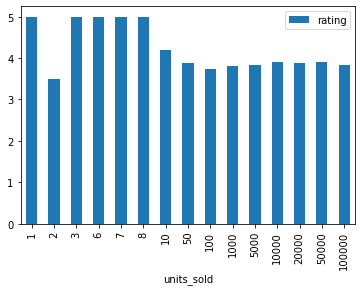

In [7]:
df_units.plot(kind="bar")

### Result

* The ratings of small units_sold products are much higher than those large units_sold products. It might because the number of samples are not enough. Those rating result probably can't represent the whole user expeirience.

* The ratings of large units_sold products (>100) distributed between 3.8 - 4.

* According to the bar chart, the units of sold products doesn't have a obvious relationship with their ratings.

### Linear Regression

array([[<AxesSubplot:xlabel='units_sold', ylabel='units_sold'>,
        <AxesSubplot:xlabel='rating', ylabel='units_sold'>],
       [<AxesSubplot:xlabel='units_sold', ylabel='rating'>,
        <AxesSubplot:xlabel='rating', ylabel='rating'>]], dtype=object)

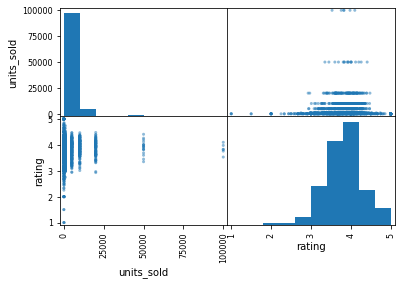

In [12]:
from pandas.plotting import scatter_matrix

scatter_matrix(df)

In [13]:
df.isnull().sum()

units_sold    0
rating        0
dtype: int64

In [14]:
X = df[['rating']]
y = df['units_sold']

display(X)
display(y)

rating
title_orig                                                
2020 Summer Vintage Flamingo Print  Pajamas Set...    3.76
Women's Casual Summer Sleeveless Sexy Mini Dress      3.45
2020 New Arrival Women Spring and Summer Beach ...    3.57
Hot Summer Cool T Shirt for Women Fashion Tops ...    4.03
Women Summer Shorts Lace Up Elastic Waistband L...    3.10
...                                                    ...
New Fashion Women Bohemia Dandelion Print Tee S...    4.08
10 Color Women Summer Shorts Lace Up Elastic Wa...    3.07
New Men Siwmwear Beach-Shorts Men Summer Quick-...    3.71
Fashion Women Summer Sleeveless Dresses V Neck ...    2.50
Fashion Women Yoga Pants Slim Fit Fitness Runni...    4.07

[1573 rows x 1 columns]

title_orig
2020 Summer Vintage Flamingo Print  Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets      100
Women's Casual Summer Sleeveless Sexy Mini Dress                                                                                          20000
2020 New Arrival Women Spring and Summer Beach Wear Long Thin Cardigan Open Front Kimono Green Leaf Printed Chiffon Cardigan S-5XL          100
Hot Summer Cool T Shirt for Women Fashion Tops Bee Printed Letters Short Sleeve O Neck Cotton T-shirts Tops Tee Clothing                   5000
Women Summer Shorts Lace Up Elastic Waistband Loose Thin Casual Pants Plus Size S-8XL                                                       100
                                                                                                                                          ...  
New Fashion Women Bohemia Dandelion Print Tee Shirt Lady Girl Short Sleeve T-shirt Boho Graphic Tee Casual Yoga Top Plus Size

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

display(X_train)
display(y_train)

rating
title_orig                                                
Women Lace Stitching Blouses Sexy Hollow Out Of...    3.65
Women's T-shirt 90's Letter Print Summer Cotton...    4.24
Women Fashion Solid Color Sexy V-neck Crop Tops...    3.52
Women Summer V Neck Mini Swing Dress Sunflower ...    3.07
Women's Fashion Summer Dresses V Neck Backless ...    5.00
...                                                    ...
5 Color New Summer Women Fashion Spaghetti Stra...    3.86
Plus Size Fashion Clothes Summer Dresses Women'...    3.79
Mother and Daughter Casual Boho Stripe Maxi Dre...    4.09
New Fashion Mens Summer Pants Slacks Shorts Spo...    3.51
Summer Women Boho Maxi Polka Dot Dress Irregula...    3.67

[1258 rows x 1 columns]

title_orig
Women Lace Stitching Blouses Sexy Hollow Out Off Shoulder Long Flare Sleeve T Shirts White Tops                                                               10000
Women's T-shirt 90's Letter Print Summer Cotton O-Neck Short Sleeve Funny Plus Size Tops                                                                       5000
Women Fashion Solid Color Sexy V-neck Crop Tops Slim Fit Summer Short Sleeve Tank Top T Shirts                                                                  100
Women Summer V Neck Mini Swing Dress Sunflower Print Sleeveless Spaghetti Strap Party Dresses Plus Size S-5XL                                                   100
Women's Fashion Summer Dresses V Neck Backless Lace Dress Beach Dresses White Dress Plus Size XS-5XL Robe Femme                                                 100
                                                                                                                                                              ...  
5 Col

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test)

array([4146.68834061, 4240.8209608 , 4030.83280806, 4074.27863276,
       4197.3751361 , 4255.30290237, 4342.19455178, 5015.60483473,
       4371.15843492, 4334.953581  , 4400.12231806, 4233.57999002,
       4096.00154512, 4414.60425963, 4291.50775629, 5015.60483473,
       3951.18212943, 3495.00097002, 3871.5314508 , 3552.92873629,
       4248.06193159, 4400.12231806, 4038.07377884, 4153.92931139,
       4320.47163943, 4501.49590904, 3820.84465531, 4001.86892492,
       4429.0862012 , 4023.59183727, 3893.25436315, 4363.91746414,
       4371.15843492, 4313.23066865, 4226.33901923, 4277.02581472,
       5015.60483473, 4081.51960355, 4291.50775629, 4052.55572041,
       4349.43552257, 4052.55572041, 4132.20639904, 4465.29105512,
       4407.36328884, 3980.14601257, 4001.86892492, 4016.35086649,
       4530.45979218, 4515.97785061, 4153.92931139, 4262.54387316,
       3632.57941492, 3676.02523962, 4342.19455178, 4161.17028217,
       4494.25493825, 4277.02581472, 5015.60483473, 3842.56756

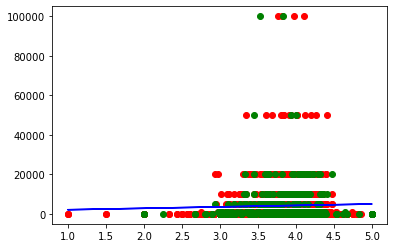

In [25]:
import matplotlib.pyplot as plt

plt.plot(X_train, model.predict(X_train), color='blue')

plt.scatter(X_train, y_train, color='red')

plt.scatter(X_test, y_test, color='green')

plt.show()

In [28]:
model.predict(pd.DataFrame([24]))

array([18773.44932497])

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(X_test))

-0.0058921947405454755

Ridge(alpha=0.5)

-0.0058919880965084825

### Result

According to the graph, we know that units_sold and rating are not linearly related.
So, the r2 score is certainly negative.

In [32]:
import joblib
joblib.dump(model, 'summer clothes.joblib')

['summer clothes.joblib']